In [1]:
# import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

wellness_data_to_load = Path("resources/wellness_and_lifestyle.csv")

wellness_data_df = pd.read_csv(wellness_data_to_load)
wellness_data_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/2015,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/2015,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/2015,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [2]:
# Build DataFrame with values related to social network

stress = wellness_data_df["DAILY_STRESS"]
core_friends = wellness_data_df["CORE_CIRCLE"]
interactions = wellness_data_df["SOCIAL_NETWORK"]
places = wellness_data_df["PLACES_VISITED"]
work_life_score = wellness_data_df["WORK_LIFE_BALANCE_SCORE"]
age_range = wellness_data_df["AGE"]
gender = wellness_data_df["GENDER"]

networking_df = pd.DataFrame({"Age": age_range,
                              "Gender": gender,
                              "Core Circle": core_friends,
                              "Network": interactions,
                              "Places Visited": places,
                              "Stress": stress,
                              "Work Life Score": work_life_score})



# Convert Stress column to integer

networking_df = networking_df.loc[(networking_df["Stress"] == "0") |
                                  (networking_df["Stress"] == "1") |
                                  (networking_df["Stress"] == "2") |
                                  (networking_df["Stress"] == "3") |
                                  (networking_df["Stress"] == "4") |
                                  (networking_df["Stress"] == "5")]

networking_df["Stress"] = networking_df["Stress"].astype(int)
networking_male_df = networking_df.loc[networking_df["Gender"] == "Male"]
networking_female_df = networking_df.loc[networking_df["Gender"] == "Female"]

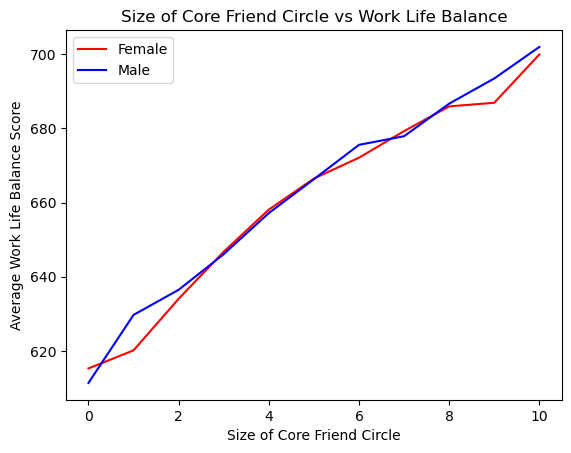

In [3]:
# Plot Core Friends vs Work Life Score
# x_axis = [0,1,2,3,4,5,6,7,8,9,10]
# y_data = networking_df.groupby("Core Circle")["Work Life Score"].mean()
# plt.plot(x_axis, y_data)

x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = networking_female_df.groupby("Core Circle")["Work Life Score"].mean()
y_male = networking_male_df.groupby("Core Circle")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

plt.title("Size of Core Friend Circle vs Work Life Balance")
plt.xlabel("Size of Core Friend Circle")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

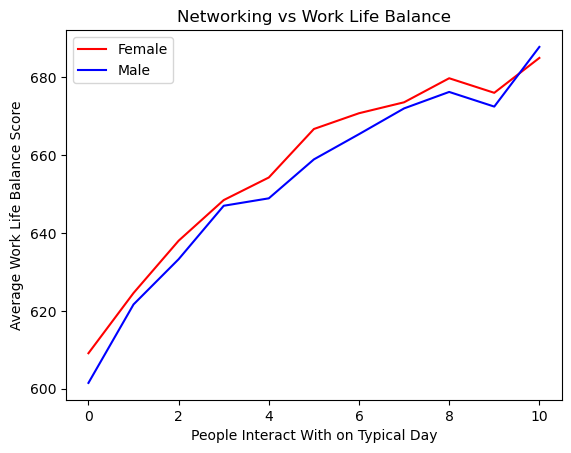

In [4]:
# Plot Networking vs Work Life Score
x_axis = [0,1,2,3,4,5,6,7,8,9,10]

# y_data = networking_df.groupby("Network")["Work Life Score"].mean()
# plt.plot(x_axis, y_data)

y_female = networking_female_df.groupby("Network")["Work Life Score"].mean()
y_male = networking_male_df.groupby("Network")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male") 

plt.title("Networking vs Work Life Balance")
plt.xlabel("People Interact With on Typical Day")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

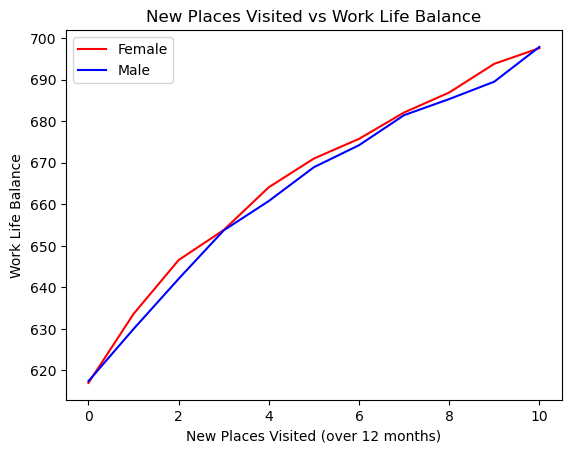

In [5]:
# Plot Places Visited vs Work Life Balance

x_axis = [0,1,2,3,4,5,6,7,8,9,10]

# y_data = networking_df.groupby("Places Visited")["Work Life Score"].mean()
# plt.plot(x_axis, y_data)

y_female = networking_female_df.groupby("Places Visited")["Work Life Score"].mean()
y_male = networking_male_df.groupby("Places Visited")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male") 

plt.title("New Places Visited vs Work Life Balance")
plt.xlabel("New Places Visited (over 12 months)")
plt.ylabel("Work Life Balance")
plt.legend(handles=[female, male], loc="best")

plt.show()

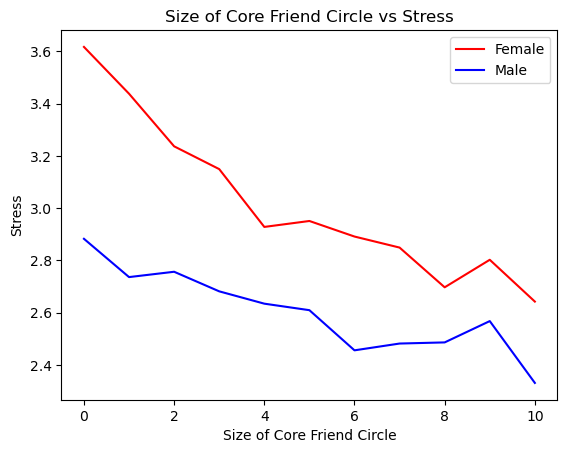

In [6]:
# Plot Core Friends vs Daily Stress

x_axis = [0,1,2,3,4,5,6,7,8,9,10]

# y_data = networking_df.groupby("Core Circle")["Stress"].mean()
# plt.plot(x_axis, y_data)

y_female = networking_female_df.groupby("Core Circle")["Stress"].mean()
y_male = networking_male_df.groupby("Core Circle")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

plt.title("Size of Core Friend Circle vs Stress")
plt.xlabel("Size of Core Friend Circle")
plt.ylabel("Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

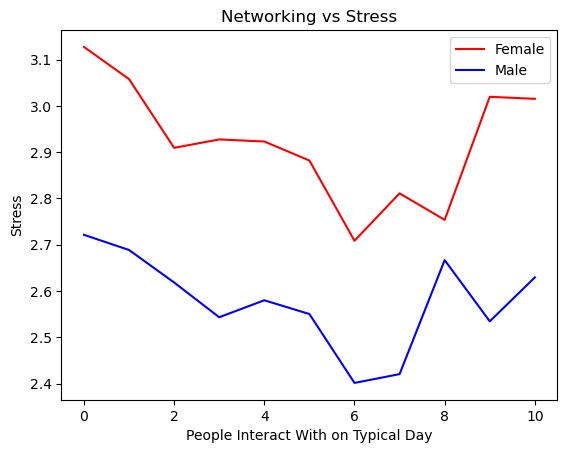

In [7]:
# Plot Networking vs Daily Stress

x_axis = [0,1,2,3,4,5,6,7,8,9,10]

# y_data = networking_df.groupby("Network")["Stress"].mean()
# plt.plot(x_axis, y_data)

y_female = networking_female_df.groupby("Network")["Stress"].mean()
y_male = networking_male_df.groupby("Network")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

plt.title("Networking vs Stress")
plt.xlabel("People Interact With on Typical Day")
plt.ylabel("Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

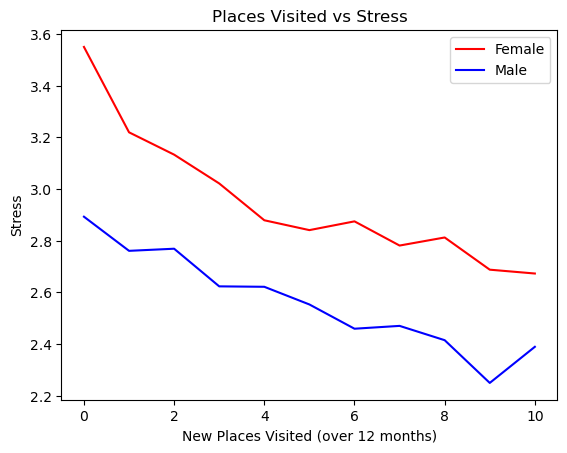

In [8]:
# Plot Places Visited vs Daily Stress

x_axis = [0,1,2,3,4,5,6,7,8,9,10]
# y_data = networking_df.groupby("Places Visited")["Stress"].mean()
# plt.plot(x_axis, y_data)

y_female = networking_female_df.groupby("Places Visited")["Stress"].mean()
y_male = networking_male_df.groupby("Places Visited")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

plt.title("Places Visited vs Stress")
plt.xlabel("New Places Visited (over 12 months)")
plt.ylabel("Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()